In [1]:
import os
import shutil
import gensim
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB,GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
tf.get_logger().setLevel('ERROR')



In [2]:
# Load the dataset
balanced_bl = pd.read_csv("balanced_processed_nostem.csv")

In [3]:
len(balanced_bl)

3836

In [4]:
balanced_bl['class'].value_counts()

False    1918
True     1918
Name: class, dtype: int64

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_bl['tokens'], balanced_bl['class'],random_state=0,test_size =0.3, stratify=balanced_bl['class'])

In [6]:
X_train

2069    ['htmlbodytable', 'styleheight', 'px', 'border...
846     ['forwarded', 'phillip', 'k', 'allenhouect', '...
2933    ['yes', 'karen', 'arnold', 'klarnoldflashnet',...
3305    ['frank', 'sep', 'basis', 'position', 'roll', ...
3834                                                   []
                              ...                        
2176    ['cyberoam', 'anti', 'virus', 'found', 'infect...
503     ['dear', 'customer', 'youve', 'placed', 'apple...
12      ['dear', 'sirmadam', 'successfully', 'change',...
113     ['dear', 'member', 'urget', 'message', 'regard...
1770    ['actually', 'started', 'writing', 'thursday',...
Name: tokens, Length: 2685, dtype: object

In [6]:
# Train a Word2Vec model on the training set
w2v_model = gensim.models.Word2Vec(X_train, vector_size=100, min_count=1, window=5, sg=1)

In [7]:
# Use the Word2Vec model to transform each message in the training and testing sets into a fixed-length vector
def word2vec_transform(data):
    transformed_data = []
    for sentence in data:
        sentence_vec = []
        for word in sentence:
            try:
                word_vec = w2v_model.wv[word]
                sentence_vec.append(word_vec)
            except KeyError:
                continue
        transformed_data.append(np.mean(sentence_vec, axis=0))
    return np.array(transformed_data)

"""This code defines a function called word2vec_transform that takes 
in a list of sentences (each sentence represented as a list of words) as input, 
and returns a transformed version of the data using Word2Vec embeddings.

Within the function, each sentence is iterated through and each word in the sentence 
is checked if it is present in the pre-trained Word2Vec model w2v_model. If it is present, 
the corresponding word vector is extracted and appended to a list called sentence_vec. If the word 
is not present in the model, it is skipped.

Once all words in a sentence have been iterated through, the list sentence_vec is converted to a numpy 
array and the mean of all the word vectors is taken along the first axis (i.e. across all word vectors 
in the sentence) using np.mean(sentence_vec, axis=0). The resulting array is appended to a list called 
transformed_data.

Finally, the function returns the transformed data as a numpy array using np.array(transformed_data).

The importance of this line of code lies in its ability to convert textual data into numerical vectors that can 
be used for machine learning tasks. The Word2Vec model is pre-trained on large text corpora, and thus has 
learned to represent words in a high-dimensional space such that semantically similar words are close together. 
By transforming sentences into vectors using Word2Vec embeddings, it is possible to capture the underlying 
semantic meaning of the text and use this representation for downstream machine learning tasks"""

In [8]:
#Apply word2vec transformed model on training and testing data
X_train_transformed = word2vec_transform(X_train)
X_test_transformed = word2vec_transform(X_test)

# LOAD THE ML ALGORITHMS

In [9]:
#Load the SVM 
clf_svm =SVC(C=3000,gamma='auto')

In [10]:
# Load the Decision tree
clf_dt = DecisionTreeClassifier()

In [11]:
# load the Logistic Regression
clf_lr = LogisticRegression(random_state=42)

In [12]:
# load the Random Forest
clf_rf = RandomForestClassifier(random_state=42)

In [13]:
# load the MLP classifier
clf_mlp = MLPClassifier()

In [14]:
# Train a Gradient Boosting Decisition Tree classifier on the transformed training set messages
clf_gbt = GradientBoostingClassifier()

# TRAIN THE ML CLASSIFIERS ON THE TRANSFORMED TRAINING SET 

In [15]:
#Train the  svm model
start_time = time()

clf_svm.fit(X_train_transformed,y_train)

end_time = time()

In [16]:
#Train the DT model
start_time_1 = time()

clf_dt.fit(X_train_transformed, y_train)

end_time_1 = time()

In [17]:
#Train the LR model
start_time_2 = time()

clf_lr.fit(X_train_transformed, y_train)

end_time_2 = time()

In [18]:
#Train the RF model
start_time_3 = time()

clf_rf.fit(X_train_transformed, y_train)

end_time_3 = time()

In [19]:
#Train the MLP model
start_time_4 = time()

clf_mlp.fit(X_train_transformed, y_train)

end_time_4 = time()

/Users/mimidubcys/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
#Train the GBT model
start_time_5 = time()

clf_gbt.fit(X_train_transformed, y_train)

end_time_5 = time()

# Training Times

In [22]:
# Print the training time
print("Training time for SVM: %.2f seconds" % (end_time - start_time),'\n'
     "Training time for DT: %.2f seconds" % (end_time_1 - start_time_1),'\n',
     "Training time for LR: %.2f seconds" % (end_time_2 - start_time_2),'\n',
     "Training time for RF: %.2f seconds" % (end_time_3 - start_time_3),'\n',
     "Training time for MLP: %.2f seconds" % (end_time_4 - start_time_4),'\n',
     "Training time for GBT: %.2f seconds" % (end_time_5 - start_time_5))

Training time for SVM: 0.37 seconds 
Training time for DT: 0.34 seconds 
 Training time for LR: 0.08 seconds 
 Training time for RF: 2.19 seconds 
 Training time for MLP: 2.81 seconds 
 Training time for GBT: 8.10 seconds


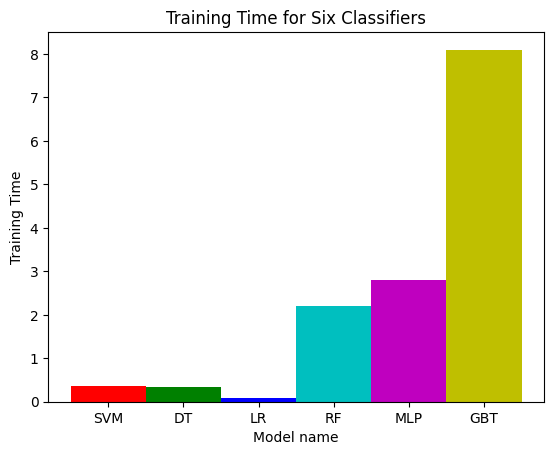

In [50]:
svm_time =end_time -start_time
dt_time = end_time_1 -start_time_1
lr_time =end_time_2 - start_time_2
rf_time =end_time_3 - start_time_3
mlp_time=end_time_4 - start_time_4
gbt_time =end_time_5 - start_time_5


time_model = {'SVM': [svm_time], 'DT': [dt_time], 'LR':[lr_time],'RF':[rf_time],'MLP':[mlp_time],'GBT':[gbt_time]}
colors= ['r', 'g', 'b', 'c', 'm', 'y']

# Plot histograms of evaluation metrics for SVM 
plt.bar(time_model.keys(),[i[0] for i in time_model.values()], color=colors, width=1)
plt.xlabel('Model name')
plt.ylabel('Training Time')
plt.title('Training Time for Six Classifiers')
plt.show()


In [52]:
data = {'Training Time': [svm_time, dt_time,lr_time,rf_time,mlp_time,gbt_time]
       }


# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data, index=['SVM', 'Decision Tree','Logistic Regression','RandomForest', 'Multilayer Perceptron','Gradient Boosting Tree'])

# Define a function to highlight the cell with the highest value in each row
def highlight_max(row):
    max_val = row.max()
    return ['background-color: green' if val == max_val else '' for val in row]

# Apply the function to each row of the dataframe
df_styled = df.style.apply(highlight_max, axis=0)

# Apply a background color to the header row
df_styled.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2')]}
])

# Apply a different background color to the cells with the highest and lowest values
#df_styled.background_gradient(subset=pd.IndexSlice[:, ['Accuracy', 'Precision', 'Recall',F1-Score]], 
#                              cmap='RdYlGn', vmin=0, vmax=1)

# Add a title to the table
df_styled.set_caption('Training Time for Word2Vec with Six Classifiers for Enron + Nazario Balanced dataset')

# Render the styled table
display(df_styled)

,Training Time
SVM,0.372543
Decision Tree,0.342770
Logistic Regression,0.076646
RandomForest,2.192850
Multilayer Perceptron,2.806991
Gradient Boosting Tree,8.098806


# MAKE PREDICTIONS

In [23]:
#SVM Prediction
y_pred_svm = clf_svm.predict(X_test_transformed)
print(y_pred_svm)

[False False  True ...  True False False]


In [24]:
#Decision Tree Prediction
y_pred_dt = clf_dt.predict(X_test_transformed)
print(y_pred_dt)

[False  True  True ...  True False  True]


In [25]:
#Logistic Regression Prediction

y_pred_lr = clf_lr.predict(X_test_transformed)
print(y_pred_lr)

[False False  True ...  True False False]


In [26]:
#Random Forest Prediction

y_pred_rf = clf_rf.predict(X_test_transformed)
print(y_pred_rf)

[False False  True ...  True False False]


In [27]:
#MLP Prediction

y_pred_mlp = clf_mlp.predict(X_test_transformed)
print(y_pred_mlp)

[False False  True ...  True False False]


In [28]:
#Gradient Boosting Tree Prediction

y_pred_gbt = clf_mlp.predict(X_test_transformed)
print(y_pred_gbt)

[False False  True ...  True False False]


# COMPUTE THE EVALUATION METRICS

In [42]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_s = accuracy_score(y_test, y_pred_svm)
confusion_mat_s = confusion_matrix(y_test, y_pred_svm)
precision_s= precision_score(y_test, y_pred_svm, average='macro')
recall_s= recall_score(y_test, y_pred_svm, average='macro')
f1_score_s=f1_score(y_test, y_pred_svm, average='macro')
fpr_s = confusion_mat_s[0][1]/sum(confusion_mat_s[0])
fnr_s = confusion_mat_s[1,0] / (confusion_mat_s[1,0] + confusion_mat_s[1,1])

In [43]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_d = accuracy_score(y_test, y_pred_dt)
confusion_mat_d = confusion_matrix(y_test, y_pred_dt)
precision_d= precision_score(y_test, y_pred_dt, average='macro')
recall_d= recall_score(y_test, y_pred_dt, average='macro')
f1_score_d=f1_score(y_test, y_pred_dt, average='macro')
fpr_d = confusion_mat_d[0][1]/sum(confusion_mat_d[0])
fnr_d = confusion_mat_d[1,0] / (confusion_mat_d[1,0] + confusion_mat_d[1,1])

In [44]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr= precision_score(y_test, y_pred_lr, average='macro')
recall_lr= recall_score(y_test, y_pred_lr, average='macro')
f1_score_lr=f1_score(y_test, y_pred_lr, average='macro')
fpr_lr = confusion_mat_mlp[0][1]/sum(confusion_mat_mlp[0])
fnr_lr = confusion_mat_lr[1,0] / (confusion_mat_lr[1,0] + confusion_mat_lr[1,1])

In [45]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf= precision_score(y_test, y_pred_rf, average='macro')
recall_rf= recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf=f1_score(y_test, y_pred_rf, average='macro')
fpr_rf = confusion_mat_rf[0][1]/sum(confusion_mat_rf[0])
fnr_rf = confusion_mat_rf[1,0] / (confusion_mat_rf[1,0] + confusion_mat_rf[1,1])

In [46]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
confusion_mat_mlp = confusion_matrix(y_test, y_pred_mlp)
precision_mlp= precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp= recall_score(y_test, y_pred_mlp, average='macro')
f1_score_mlp=f1_score(y_test, y_pred_mlp, average='macro')
fpr_mlp = confusion_mat_mlp[0][1]/sum(confusion_mat_mlp[0])
fnr_mlp = confusion_mat_mlp[1,0] / (confusion_mat_mlp[1,0] + confusion_mat_mlp[1,1])

In [47]:
# Compute accuracy and confusion matrix,recall score, f1score and precision score
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
confusion_mat_gbt = confusion_matrix(y_test, y_pred_gbt)
precision_gbt= precision_score(y_test, y_pred_gbt, average='macro')
recall_gbt= recall_score(y_test, y_pred_gbt, average='macro')
f1_score_gbt=f1_score(y_test, y_pred_gbt, average='macro')
fpr_gbt = confusion_mat_gbt[0][1]/sum(confusion_mat_gbt[0])
fnr_gbt = confusion_mat_gbt[1,0] / (confusion_mat_gbt[1,0] + confusion_mat_gbt[1,1])

# DISPLAY THE RESULTS

In [48]:
# Print the accuracy,precision,recall, and f1score
print("Accuracy:", accuracy_s,accuracy_d,accuracy_lr,accuracy_rf,accuracy_mlp,accuracy_gbt)
print("Precision:",precision_s,precision_d,precision_lr,precision_rf,precision_mlp,precision_gbt)
print("Recall:", recall_s,recall_d,recall_lr,recall_rf,recall_mlp,recall_gbt)
print("f1-Score", f1_score_d,f1_score_lr,f1_score_rf,f1_score_mlp,f1_score_gbt)
print("False Positive Rate: ", fpr_s,fpr_d,fpr_lr,fpr_rf,fpr_mlp,fpr_gbt)
print("False Negative Rate: ", fnr_s,fnr_d,fnr_lr,fnr_rf,fnr_mlp,fnr_gbt)

Accuracy: 0.8679409209383145 0.8549087749782798 0.7688966116420504 0.9218071242397915 0.8557775847089487 0.8557775847089487
Precision: 0.8682946804716918 0.8549633996086294 0.775955852270614 0.9219292682190209 0.8599343957876476 0.8599343957876476
Recall: 0.8679544082125604 0.8549033816425121 0.7688269927536232 0.92181461352657 0.8558242753623189 0.8558242753623189
f1-Score 0.8549017654070205 0.7673779320321665 0.9218023431366629 0.8553713628243559 0.8553713628243559
False Positive Rate:  0.14756944444444445 0.1388888888888889 0.19791666666666666 0.08680555555555555 0.19791666666666666 0.19791666666666666
False Negative Rate:  0.11652173913043479 0.15130434782608695 0.31130434782608696 0.06956521739130435 0.09043478260869565 0.09043478260869565


In [49]:
# Create a dictionary of the metrics results
data = {'Accuracy': [accuracy_s, accuracy_d,accuracy_lr,accuracy_rf,accuracy_mlp,accuracy_gbt], 
        'Precision': [precision_s, precision_d,precision_lr,precision_rf,precision_mlp,precision_gbt], 
        'Recall': [recall_s, recall_d,recall_lr,recall_rf, recall_mlp,recall_gbt],
        'F1-Score':[f1_score_s,f1_score_d,f1_score_lr,f1_score_rf,f1_score_mlp,f1_score_gbt],
       'False Positive Rate':[fpr_s,fpr_d,fpr_lr,fpr_rf,fpr_mlp,fpr_gbt],
       'False Negative Rate':[fnr_s,fnr_d,fnr_lr,fnr_rf,fnr_mlp,fnr_gbt]}


# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data, index=['SVM', 'Decision Tree','Logistic Regression','RandomForest', 'Multilayer Perceptron','Gradient Boosting Tree'])

# Define a function to highlight the cell with the highest value in each row
def highlight_max(row):
    max_val = row.max()
    return ['background-color: green' if val == max_val else '' for val in row]

# Apply the function to each row of the dataframe
df_styled = df.style.apply(highlight_max, axis=0)

# Apply a background color to the header row
df_styled.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2')]}
])

# Apply a different background color to the cells with the highest and lowest values
#df_styled.background_gradient(subset=pd.IndexSlice[:, ['Accuracy', 'Precision', 'Recall',F1-Score]], 
#                              cmap='RdYlGn', vmin=0, vmax=1)

# Add a title to the table
df_styled.set_caption('Results for Word2Vec with Six Classifiers for Enron + Nazario Balanced dataset')

# Render the styled table
display(df_styled)


,Accuracy,Precision,Recall,F1-Score,False Positive Rate,False Negative Rate
SVM,0.867941,0.868295,0.867954,0.867912,0.147569,0.116522
Decision Tree,0.854909,0.854963,0.854903,0.854902,0.138889,0.151304
Logistic Regression,0.768897,0.775956,0.768827,0.767378,0.197917,0.311304
RandomForest,0.921807,0.921929,0.921815,0.921802,0.086806,0.069565
Multilayer Perceptron,0.855778,0.859934,0.855824,0.855371,0.197917,0.090435
Gradient Boosting Tree,0.855778,0.859934,0.855824,0.855371,0.197917,0.090435


# Build a histogram of the Evaluation results

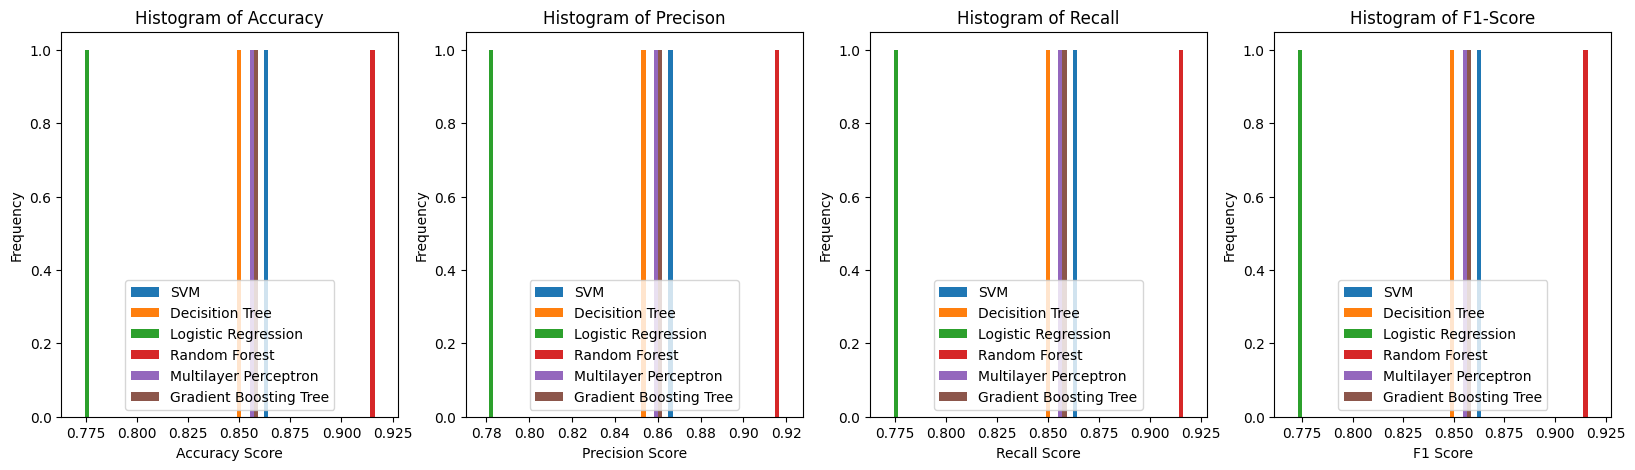

In [40]:
metrics = ['SVM', 'Decisition Tree', 'Logistic Regression', 'Random Forest','Multilayer Perceptron', 'Gradient Boosting Tree']
data = {'SVM': [accuracy_s], 'DT': [accuracy_d],'LR': [accuracy_lr],'RF':[accuracy_rf], 'MLP':[accuracy_mlp],'GBT':[accuracy_gbt]}


# Create two subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot histograms of evaluation metrics for SVM 
axs[0].hist(data.values(), bins=10, label=metrics)
axs[0].set_xlabel('Accuracy Score')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Accuracy')
axs[0].legend()



data1 = {'SVM': [precision_s], 'DT': [precision_d], 'LR': [precision_lr],'RF':[precision_rf], 'MLP':[precision_mlp],'GBT':[precision_gbt]}

# Plot histograms of evaluation metrics for SVM 
axs[1].hist(data1.values(), bins=10, label=metrics)
axs[1].set_xlabel('Precision Score')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Precison')
axs[1].legend()


data2 = {'SVM': [recall_s], 'DT': [recall_d],'LR': [recall_lr],'RF':[recall_rf], 'MLP':[recall_mlp],'GBT':[recall_gbt]}

# Plot histograms of evaluation metrics for SVM 
axs[2].hist(data2.values(), bins=10, label=metrics)
axs[2].set_xlabel('Recall Score')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Recall')
axs[2].legend()


data3 = {'SVM': [f1_score_s], 'DT': [f1_score_d],'LR': [f1_score_lr],'RF':[f1_score_rf], 'MLP':[f1_score_mlp],'GBT':[f1_score_gbt]}

# Plot histograms of evaluation metrics for SVM 
axs[3].hist(data3.values(), bins=10, label=metrics)
axs[3].set_xlabel('F1 Score')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Histogram of F1-Score')
axs[3].legend()
plt.show()


# DISPLAY THE CONFUSION MATRIX

In [38]:
#Print Confusion Matrix
print("Confusion Matrix SVM:\n", confusion_mat_s,'\n',
     "Confusion Matrix DT:\n", confusion_mat_d,'\n',
     "Confusion Matrix LR:\n", confusion_mat_lr,'\n',
     "Confusion Matrix RF:\n", confusion_mat_rf,'\n',
     "Confusion Matrix MLP:\n", confusion_mat_mlp,'\n',
     "Confusion Matrix GBT:\n", confusion_mat_gbt)

Confusion Matrix SVM:
 [[491  85]
 [ 67 508]] 
 Confusion Matrix DT:
 [[496  80]
 [ 87 488]] 
 Confusion Matrix LR:
 [[489  87]
 [179 396]] 
 Confusion Matrix RF:
 [[526  50]
 [ 40 535]] 
 Confusion Matrix MLP:
 [[462 114]
 [ 52 523]] 
 Confusion Matrix GBT:
 [[462 114]
 [ 52 523]]


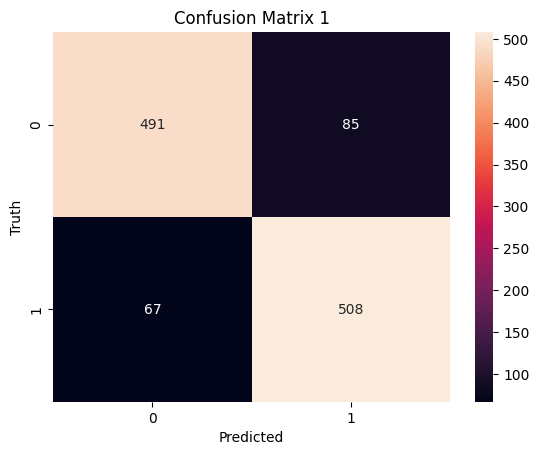

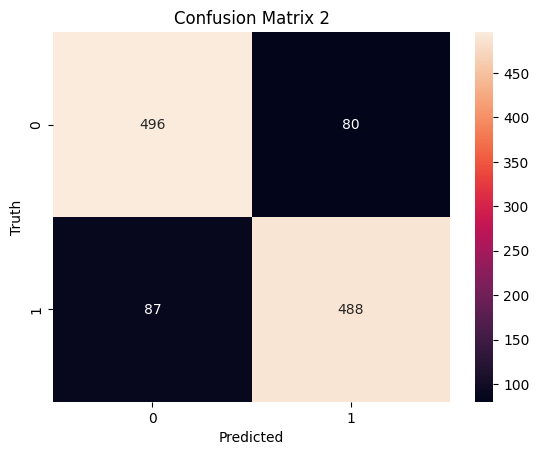

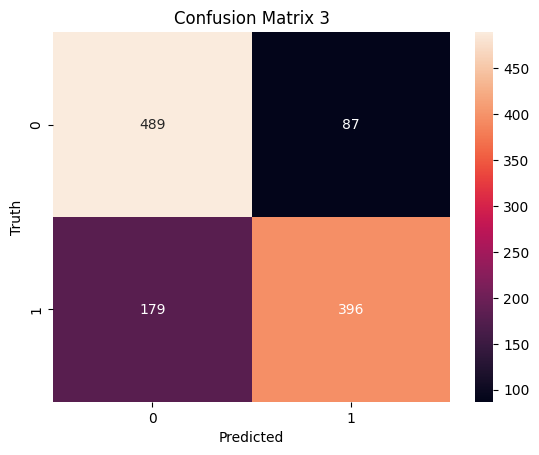

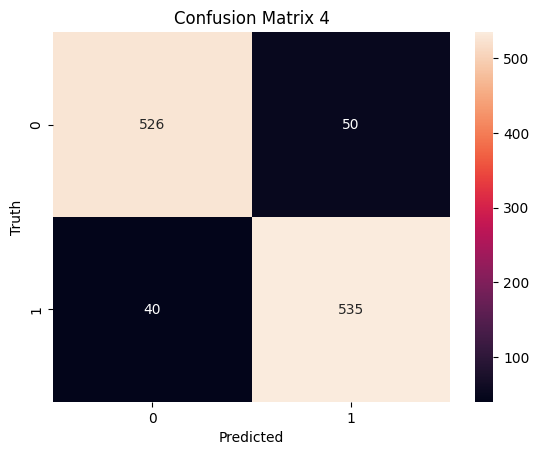

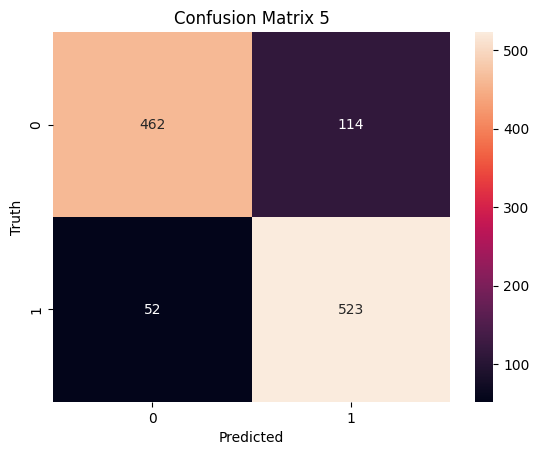

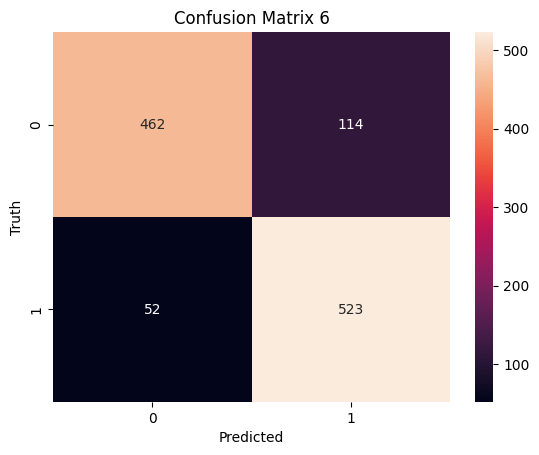

In [39]:
# Plot each confusion matrix using seaborn
for i, confusion_mat in enumerate([confusion_mat_s, confusion_mat_d, confusion_mat_lr,confusion_mat_rf,confusion_mat_mlp,confusion_mat_gbt]):
    plt.figure()
    plt.title(f"Confusion Matrix {i+1}")
    sn.heatmap(confusion_mat, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")

plt.show()